## Looking for dipolarization events

Now we want to look for dipolarization fronts with the following criteria

<img src="df_criteria.png">


In [1]:
from datetime import datetime
import numpy as np
from aidapy import event_search

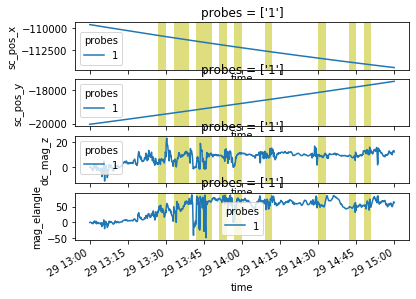

In [3]:
# Time interval
start_time = datetime(2003, 8, 29, 13, 0, 0)
end_time = datetime(2003, 8, 29, 15, 0, 0)


# Input criteria for DF events
settings = {
    
    "criteria": lambda sc_pos_x, sc_pos_y, dc_mag_z, mag_elangle:
    (np.all(sc_pos_x <= -5 * 6378)) & (np.all(np.abs(sc_pos_y) <= 15 * 6378)) &
    (np.abs(mag_elangle[np.where(dc_mag_z == np.min(dc_mag_z))[0]] - mag_elangle[np.where(dc_mag_z == np.max(dc_mag_z))[0]]) > 10) &
    (np.where(dc_mag_z == np.max(dc_mag_z))[0] > np.where(dc_mag_z == np.min(dc_mag_z))[0]) &
    (np.any(mag_elangle > 45)),
    
    "parameters": {"mission": "cluster",
                   "process": "df",
                   "probes": ['1'],
                   "time_window": 180,
                   "coords": "gse",
                   "mode": 'low_res',
                   "time_step": 180,
                   "sample_freq": 1}}


# Call Event Search subpackage
event_search(settings, start_time, end_time)